In [73]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing and Setuping Up Dataset

In [74]:
df = pd.read_csv('games.csv', low_memory=False)
df.head()

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit


In [75]:
df_sample = df.sample(n=10000, random_state=1337)

In [76]:
# Remove uncalibrated games
df = df[df['White Rating'] != '?']
df = df[df['Black Rating'] != '?']

In [77]:
df = df.astype({
    'White Rating': int,
    'Black Rating': int,
})

In [109]:
df['Rating Diff'] = abs(df['White Rating'] - df['Black Rating'])
df['Avg Rating'] = (df['White Rating'] + df['Black Rating']) / 2

# Rating Analysis

In [144]:
Rating_Ranges = [1200, 1400, 1600, 1800, 2000, 2200]

(775.999, 1200.0]     63768
(1200.0, 1400.0]     257862
(1400.0, 1600.0]     574210
(1600.0, 1800.0]     605629
(1800.0, 2000.0]     346281
(2000.0, 2200.0]      99897
(2200.0, 2792.0]      18625
dtype: int64

<AxesSubplot:>

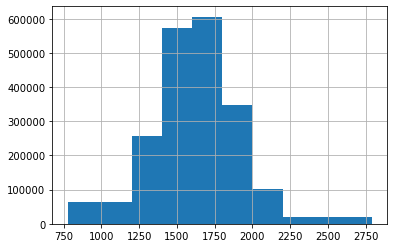

In [145]:
rating = df['White Rating'].append(df['Black Rating'], ignore_index=True)
bins = [rating.min()] + Rating_Ranges + [rating.max()]
display(rating.value_counts(bins=bins, sort=False))
rating.hist(bins=bins)

(-1.623, 81.1]      391033
(81.1, 162.2]       260387
(162.2, 243.3]      151328
(243.3, 324.4]       82829
(324.4, 405.5]       45007
(405.5, 486.6]       24289
(486.6, 567.7]       13311
(567.7, 648.8]        6957
(648.8, 729.9]        3879
(729.9, 811.0]        2244
(811.0, 892.1]        1021
(892.1, 973.2]         495
(973.2, 1054.3]        221
(1054.3, 1135.4]        75
(1135.4, 1216.5]        29
(1216.5, 1297.6]        17
(1297.6, 1378.7]         5
(1378.7, 1459.8]         7
(1459.8, 1540.9]         1
(1540.9, 1622.0]         1
Name: Rating Diff, dtype: int64

<AxesSubplot:>

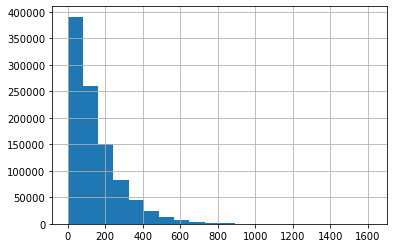

In [115]:
display(df['Rating Diff'].value_counts(bins=20, sort=False))
df['Rating Diff'].hist(bins=20)

(885.499, 1200.0]     17539
(1200.0, 1400.0]     120874
(1400.0, 1600.0]     308128
(1600.0, 1800.0]     328036
(1800.0, 2000.0]     161989
(2000.0, 2200.0]      41215
(2200.0, 2618.0]       5355
Name: Avg Rating, dtype: int64

<AxesSubplot:>

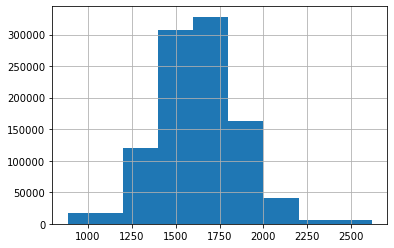

In [146]:
avg_bins = [df['Avg Rating'].min()] + Rating_Ranges + [df['Avg Rating'].max()]
display(df['Avg Rating'].value_counts(bins=avg_bins, sort=False))
df['Avg Rating'].hist(bins=avg_bins)

In [79]:
df['Event'].value_counts()

Rated Blitz game               378028
Rated Classical game           278537
Rated Bullet game              229353
Rated Blitz tournament          55485
Rated Bullet tournament         36461
Rated Classical tournament       2891
Rated Correspondence game        2381
Name: Event, dtype: int64

In [84]:
df['Event'].unique()

array(['Rated Blitz game', 'Rated Classical game',
       'Rated Blitz tournament ', 'Rated Bullet game',
       'Rated Bullet tournament ', 'Rated Correspondence game',
       'Rated Classical tournament '], dtype=object)

# Opening Analysis

In [151]:
df['Opening'].value_counts(normalize=True)
counts = df['Opening'].value_counts()
percentage = df['Opening'].value_counts(normalize=True).mul(100)
open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
open_stats.head(50)

,counts,percentage
Van't Kruijs Opening,24818,2.524371
Modern Defense,18979,1.930455
Horwitz Defense,18829,1.915198
Scandinavian Defense: Mieses-Kotroc Variation,16162,1.643923
Owen Defense,15136,1.539563
French Defense: Knight Variation,14393,1.463989
Sicilian Defense,13289,1.351695
Caro-Kann Defense,12692,1.290971
Hungarian Opening,12425,1.263813
Queen's Pawn Game #2,12238,1.244792


In [148]:
for event in df['Event'].unique():
    df_event = df[df['Event'] == event]
    print(f'Popular Openings in {event}')
    counts = df_event['Opening'].value_counts()
    percentage = df_event['Opening'].value_counts(normalize=True).mul(100)
    open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
    display(open_stats.head(10))

Popular Openings in Rated Blitz game


,counts,percentage
Van't Kruijs Opening,7497,1.983186
Horwitz Defense,7050,1.864941
Scandinavian Defense: Mieses-Kotroc Variation,6136,1.623160
French Defense: Knight Variation,6081,1.608611
Owen Defense,5831,1.542478
Modern Defense,5634,1.490366
Sicilian Defense,5241,1.386405
Queen's Pawn Game #2,4977,1.316569
Caro-Kann Defense,4300,1.137482
Philidor Defense #3,4280,1.132191


Popular Openings in Rated Classical game


,counts,percentage
Van't Kruijs Opening,5713,2.051074
Sicilian Defense: Bowdler Attack,5453,1.957729
Philidor Defense #2,4849,1.740882
Scandinavian Defense: Mieses-Kotroc Variation,4728,1.697441
Horwitz Defense,4700,1.687388
Philidor Defense #3,4408,1.582555
Sicilian Defense,4083,1.465873
Bishop's Opening,4037,1.449359
French Defense: Knight Variation,3860,1.385812
Scandinavian Defense,3486,1.251539


Popular Openings in Rated Blitz tournament 


,counts,percentage
Sicilian Defense: Bowdler Attack,893,1.609444
Modern Defense,836,1.506714
Sicilian Defense,791,1.425611
Caro-Kann Defense,778,1.402181
Van't Kruijs Opening,733,1.321078
Scandinavian Defense: Mieses-Kotroc Variation,705,1.270614
Sicilian Defense: Old Sicilian,672,1.211138
Horwitz Defense,646,1.164279
Queen's Pawn Game: Zukertort Variation,630,1.135442
Hungarian Opening,627,1.130035


Popular Openings in Rated Bullet game


,counts,percentage
Van't Kruijs Opening,9068,3.953731
Modern Defense,8253,3.598383
Horwitz Defense,5544,2.417235
Hungarian Opening,5490,2.393690
Owen Defense,4865,2.121184
Mieses Opening,4622,2.015234
Scandinavian Defense: Mieses-Kotroc Variation,4267,1.860451
Nimzo-Larsen Attack,4160,1.813798
Queen's Pawn,3956,1.724852
Caro-Kann Defense,3434,1.497255


Popular Openings in Rated Bullet tournament 


,counts,percentage
Van't Kruijs Opening,1651,4.528126
Mieses Opening,938,2.572612
Scandinavian Defense,902,2.473876
Caro-Kann Defense,898,2.462906
Queen's Pawn,868,2.380626
Hungarian Opening,863,2.366913
Horwitz Defense,810,2.221552
Modern Defense,809,2.218809
Queen's Pawn Game #2,735,2.015853
Pirc Defense #4,703,1.928088


Popular Openings in Rated Correspondence game


,counts,percentage
Van't Kruijs Opening,118,4.955901
Kadas Opening,89,3.737925
King's Pawn Game: Leonardis Variation,39,1.637967
Scandinavian Defense,39,1.637967
Modern Defense,38,1.595968
Hungarian Opening,37,1.553969
Queen's Pawn Game: Chigorin Variation,36,1.511970
Van Geet Opening,35,1.469971
Scandinavian Defense: Mieses-Kotroc Variation,33,1.385972
Horwitz Defense,32,1.343973


Popular Openings in Rated Classical tournament 


,counts,percentage
Sicilian Defense: Bowdler Attack,54,1.867866
Caro-Kann Defense,50,1.729505
Horwitz Defense,47,1.625735
Philidor Defense #3,45,1.556555
Queen's Pawn Game: Zukertort Variation,44,1.521965
Queen's Gambit Refused: Marshall Defense,41,1.418194
Bird Opening,41,1.418194
Bishop's Opening,40,1.383604
Van't Kruijs Opening,38,1.314424
Queen's Pawn Game: Chigorin Variation,38,1.314424
